# 이산확률변수

## 이산확률변수 -> 확률질량함수

In [17]:
import itertools

coin = {'H', 'T'}
r = 4

#상태공간(Sx)
coins = list(itertools.product(coin, repeat=r))
coins = [ "".join(i) for i in coins]
print(f'동전 {r}번 던지는 상태공간(Sx): {coins}')

#확률변수 x
S = [x.count("H") for x in coins]
X = list(set(S))
print(f'확률변수(X): {X}')

#확률질량함수 f(x)
def f(x):
  return S.count(x) / len(coins)

#확률
prob = [ f(x) for x in X]
print(f'확률변수 X의 확률: {dict(zip(X, prob))}')

#확률구하기
print(f'(b)앞면의 횟수가 2일 확률: {f(2)}')
print(f'(c)앞면의 횟수가 2 이상일 확률: {sum([ f(x) for x in range(2, len(X)) ])}')
print(f'(c)앞면의 횟수가 3 이하일 확률: {sum([ f(x) for x in range(3, -1, -1) ])}')


동전 4번 던지는 상태공간(Sx): ['TTTT', 'TTTH', 'TTHT', 'TTHH', 'THTT', 'THTH', 'THHT', 'THHH', 'HTTT', 'HTTH', 'HTHT', 'HTHH', 'HHTT', 'HHTH', 'HHHT', 'HHHH']
확률변수(X): [0, 1, 2, 3, 4]
확률변수 X의 확률: {0: 0.0625, 1: 0.25, 2: 0.375, 3: 0.25, 4: 0.0625}
(b)앞면의 횟수가 2일 확률: 0.375
(c)앞면의 횟수가 2 이상일 확률: 0.6875
(c)앞면의 횟수가 3 이하일 확률: 0.9375


In [18]:
X = list()

for i in range(1, 7):
  for j in range(1, 7):
    X.append(abs(i-j))

Sx = set(X)
print(Sx)


{0, 1, 2, 3, 4, 5}


## 확률질량함수와 확률 구하기

In [19]:
def f(x):
  cnt = 0
  for i in range(1, 7):
    for j in range(1, 7):
      if (abs(i-j)==x):
        cnt +=1
  return cnt / (36)

probs = [f(x) for x in Sx]
print(f'확률질량함수 f(X): {dict(zip(X, probs))}')

확률질량함수 f(X): {0: 0.16666666666666666, 1: 0.2777777777777778, 2: 0.2222222222222222, 3: 0.16666666666666666, 4: 0.1111111111111111, 5: 0.05555555555555555}


## 분포함수

In [20]:
# 3. 분포함수
def F(x):
    return sum([f(u) for u in X if u<=x])
s_prob = [ F(x) for x in Sx ]
print(f'확률분포함수: {dict(zip(X, s_prob))}')

확률분포함수: {0: 0.9999999999999999, 1: 3.777777777777777, 2: 5.555555555555555, 3: 6.555555555555556, 4: 7.000000000000001, 5: 7.111111111111112}


# 연속확률변수

## 연속확률변수 -> 확률밀도함수

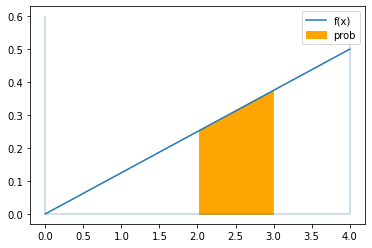

In [21]:
import numpy as np
import matplotlib.pyplot as plt
# 1. 연속확률변수 구간
X_range = [0, 4]

# 2. 확률밀도함수(fx)
def f(x):
  if X_range[0] <= x <= X_range[1]:
    return (1/8*x)
  else:
    return 0

#그래프로 그리기
X = np.linspace(X_range[0], X_range[1], 100) #0~4를 100개의 구간으로 나누기
Y = [ f(x) for x in X ]

plt.plot(X, Y, label='f(x)')
plt.fill_between(X, Y, where=(X>2)&(X<=3), color='orange', label='prob')
plt.legend()

plt.hlines(0,0,4,alpha=0.3)
plt.vlines(0,0,0.6,alpha=0.3)
plt.vlines(X.max(),0,0.6,alpha=0.3)
plt.show()



### 확률구하고 그래프로 나타내기

전체 수는 10만명, 평균 140, 표준편차 5
무작위로 한 명을 추출할 경우 그 학생의 키가 145 이상, 150 미만일 확률

numpy.randonm.randn(m,n) -> 평균 0, 표준편차 1의 표준정규분포 난수를 생성

In [22]:
S, MEAN, STD = 100000, 140, 5
data = MEAN + np.random.randn(S) * STD

print(data.mean())
print(data.std())


140.01346151720108
4.982282969156924
